In [1]:
%matplotlib inline
import pandas as pd
import os

In [2]:
h5_location = './../runs/run4.h5'

In [3]:
store = pd.HDFStore(h5_location)
parcels_lid = store['base/parcels'][['large_area_id']]
lids = parcels_lid.large_area_id.unique()
years = range(2016, 2046)

In [4]:
def filterdf(df, use):
    if use=='res':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft == 0)]
    elif use=='nonres':
        return df.loc[(df.residential_units == 0)
                      & (df.non_residential_sqft > 0)]
    elif use=='mixed':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft > 0)]
    else:
        return df

In [5]:
results = pd.DataFrame(index=parcels_lid.large_area_id.unique())

for use in ['res', 'nonres', 'mixed', 'total']:
    for year in years:
        buildings_name = '{}/buildings'.format(year)
        buildings = store[buildings_name]
        buildings = filterdf(buildings, use)
        b = buildings[['year_built', 'parcel_id']]
        b = b.merge(parcels_lid, left_on='parcel_id', right_index=True)
        b = b.loc[b.year_built == year]
        built_by_lid = b.groupby('large_area_id').count().year_built
        results[year] = built_by_lid
    results.to_csv('run4_{}.csv'.format(use))

In [6]:
total = pd.read_csv('run4_total.csv', index_col=0)

In [7]:
total

,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,...,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045
5,95,11,20,12,50,27.0,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1655,225,459,225,3086,NaN,NaN,NaN,NaN,58,...,15.0,11.0,30.0,30.0,22.0,17.0,18.0,17.0,16.0,27.0
125,8249,1906,1641,1484,8537,184.0,215.0,55.0,76.0,579,...,1395.0,67.0,48.0,65.0,343.0,113.0,73.0,48.0,110.0,47.0
99,1902,240,152,370,7231,NaN,NaN,NaN,113.0,662,...,3.0,2.0,5.0,4.0,11.0,4.0,9.0,2.0,2.0,21.0
161,1307,787,736,571,1067,1101.0,848.0,565.0,413.0,415,...,84.0,86.0,56.0,75.0,72.0,69.0,60.0,73.0,56.0,62.0
115,207,22,15,12,834,NaN,NaN,5.0,41.0,46,...,NaN,NaN,NaN,1.0,121.0,NaN,NaN,1.0,NaN,NaN
147,430,71,45,13,199,NaN,4.0,60.0,19.0,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
93,1265,321,231,249,1893,NaN,71.0,138.0,78.0,360,...,40.0,22.0,31.0,29.0,296.0,NaN,5.0,3.0,1.0,2.0


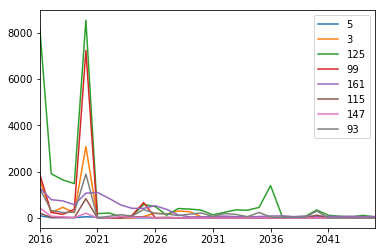

In [8]:
for l in lids:
    total.fillna(0).loc[l].plot(legend=True)

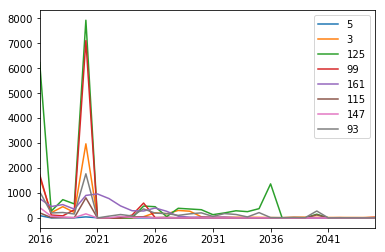

In [9]:
res = pd.read_csv('run4_res.csv', index_col=0)
for l in lids:
    res.fillna(0).loc[l].plot(legend=True)

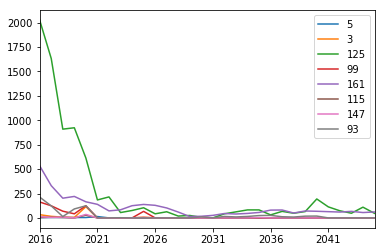

In [10]:
nonres = pd.read_csv('run4_nonres.csv', index_col=0)
for l in lids:
    nonres.fillna(0).loc[l].plot(legend=True)

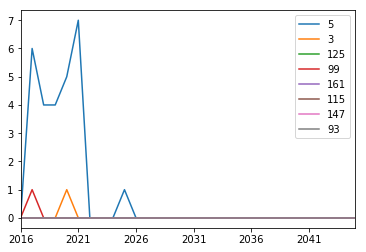

In [11]:
mixed = pd.read_csv('run4_mixed.csv', index_col=0)
for l in lids:
    mixed.fillna(0).loc[l].plot(legend=True)